## PROBLEM SET 5

In [7]:
import numpy as np
import pandas as pd
from scipy.linalg import hadamard
from math import comb
from matplotlib import pyplot as plt

### PART 1

In [8]:
n = 2**9

In [9]:
hada_matrix = hadamard(n)

In [10]:
def compute_Q(score, p, num):
    Q = 0
    if num < 3:
        for j in np.arange(0, p - 1):
            for j_prime in np.arange(j+1, p):
                Q += score[j, j_prime] ** num
        return Q / comb(p, 2)
    else:
        for j in np.arange(0, p - 1):
            for j_prime in np.arange(j+1, p):
                Q = max(Q, score[j, j_prime])
        return Q

In [11]:
def lin_design(matrix, set_size, nsims, num_cols):
    Q1, Q2, Q3 = [], [], []
    for i in np.arange(nsims):
        smol_matrix = matrix
        idx = list(np.random.choice(a = np.arange(1, set_size), size = num_cols))
        for i in idx:
            smol_matrix = smol_matrix[smol_matrix[:,i] == 1]
        smol_matrix = np.delete(smol_matrix, [0] + idx, axis = 1)
        n_prime = smol_matrix.shape[0]
        score = np.abs((1/n_prime) * np.matmul(np.transpose(smol_matrix), smol_matrix))
        p = smol_matrix.shape[1]
        Q1.append(compute_Q(score, p, 1))
        Q2.append(compute_Q(score, p, 2))
        Q3.append(compute_Q(score, p, 3))
    return Q1, Q2, Q3

### Run lin approach with 1/2 of the data

In [12]:
Q1, Q2, Q3 = lin_design(hada_matrix, n, 100, 1)

In [13]:
def sampling_design(matrix, size, nsims, num_samp):
    Q1, Q2, Q3 = [], [], []
    for i in np.arange(nsims):
        rows_id = np.random.choice(range(1,n), size = int(n/num_samp), replace = False)
        rows_id.sort()
        smol_matrix = matrix[rows_id, :]
        smol_matrix = np.delete(smol_matrix, 0, axis=1)
        n_prime = smol_matrix.shape[0]
        score = np.abs((1/n_prime) * np.matmul(np.transpose(smol_matrix), smol_matrix))
        Q1.append(compute_Q(score, n - 1, 1))
        Q2.append(compute_Q(score, n - 1, 2))
        Q3.append(compute_Q(score, n - 1, 3))
    return Q1, Q2, Q3

### Run sampling approach with 1/2 of the data

In [14]:
Q1_samp, Q2_samp, Q3_samp = sampling_design(hada_matrix, n,100, 2)

### Overlayed graphs

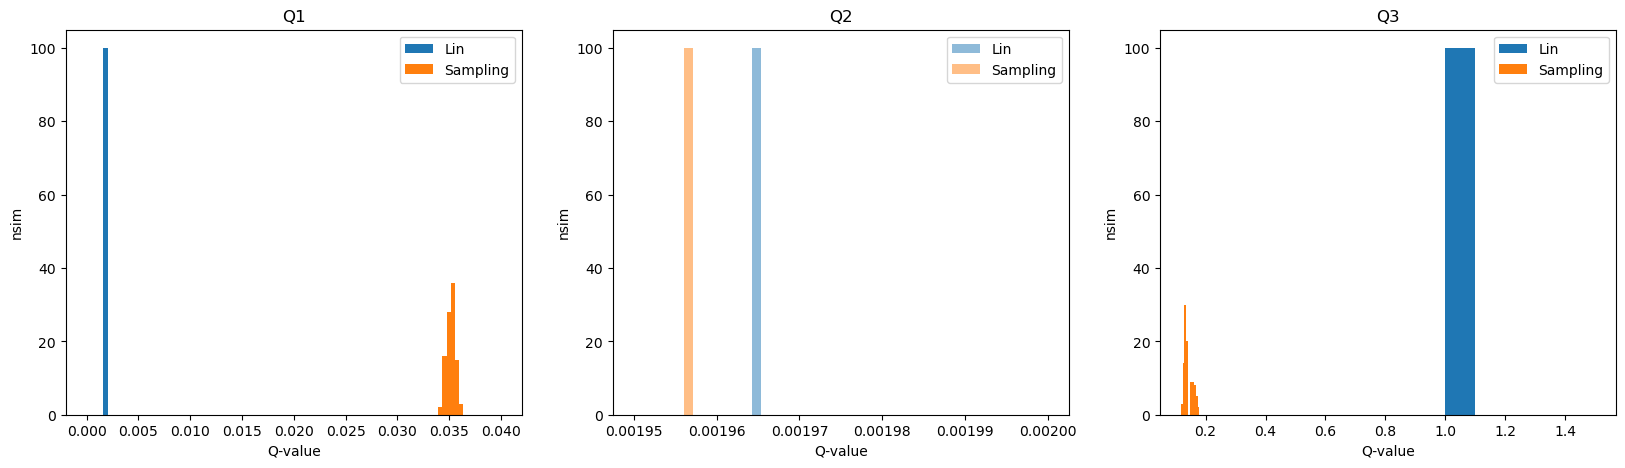

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
bins = np.linspace(0, .04, 100)
bins2 = np.linspace(0.00195, .0020, 50)
ax1.hist(Q1, bins = bins);
ax1.hist(Q1_samp, bins = bins)
ax1.set_title('Q1')
ax1.legend(['Lin', 'Sampling'])
ax2.hist(Q2, alpha = 0.5, bins = bins2);
ax2.hist(Q2_samp, alpha = 0.5, bins = bins2)
ax2.set_title('Q2')
ax2.legend(['Lin', 'Sampling'])
ax3.hist(Q3);
ax3.hist(Q3_samp)
ax3.set_title('Q3');
ax3.legend(['Lin', 'Sampling'])

for ax in (ax1, ax2, ax3):
    ax.set(xlabel='Q-value', ylabel='nsim')

### Which method seems to work better?

To evaluate our approach, we calculate three metrics, Q1, Q2, and Q_inf. We want to minimize all three criteria since a smaller Q indicates a greater degree of orthogonality among the columns, which is the desired property for supersaturated designs. For the Lin approach, the Q1, Q2, and Q_inf values were constant and equal to 0.00196, 0.00196, and 1 respectively. For the Downsampling approach, the Q1 and Q_inf values were variable with means of 0.03518 and 0.1417 respectively, wheras the Q2 value was constant and equal to 0.00195 (which is very slightly lower than the Lin Q2 value). Thus, we can see that the Lin approach outperforms the Downsampling approach for metric Q1, but the Downsampling approach outperforms the Lin approach for metrics Q2 and Q_inf. Therefore, Downsampling outperforms Lin for 2/3 of the criteria.

### Part 2

### Run lin approach with 1/16 of the data

In [37]:
Q1, Q2, Q3 = lin_design(hada_matrix, n, 100, 4)

### Run sampling approach with 1/16 of the data

In [38]:
Q1_samp, Q2_samp, Q3_samp = sampling_design(hada_matrix, n,100, 16)

### Overlayed Graphs

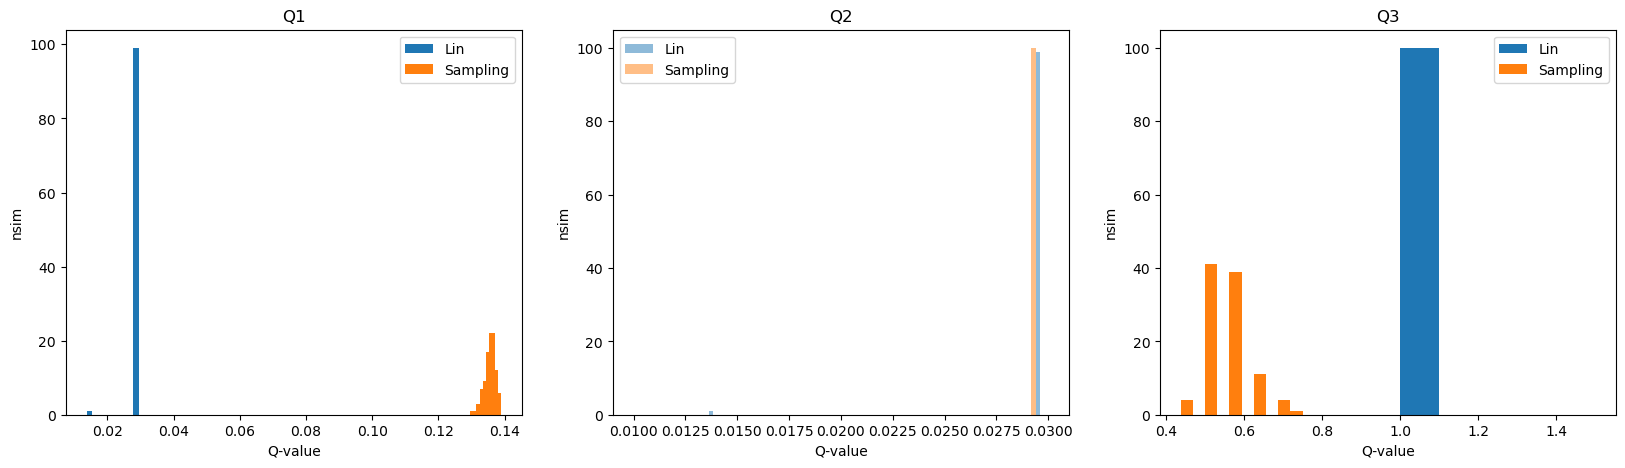

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
bins = np.linspace(0.01, .03, 100)
ax1.hist(Q1);
ax1.hist(Q1_samp)
ax1.set_title('Q1')
ax1.legend(['Lin', 'Sampling'])
ax2.hist(Q2, alpha = 0.5, bins = bins)
ax2.hist(Q2_samp, alpha = 0.5, bins = bins)
ax2.set_title('Q2')
ax2.legend(['Lin', 'Sampling'])
ax3.hist(Q3);
ax3.hist(Q3_samp)
ax3.set_title('Q3');
ax3.legend(['Lin', 'Sampling'])
for ax in (ax1, ax2, ax3):
    ax.set(xlabel='Q-value', ylabel='nsim')

### Which method seems to work better?

In [59]:
np.mean(Q2)

0.029273025975946478

To evaluate our approach, we calculate three metrics, Q1, Q2, and Q_inf. We want to minimize all three criteria since a smaller Q indicates a greater degree of orthogonality among the columns, which is the desired property for supersaturated designs. For the Lin approach, the Q1 and Q2 values were constant in two values, [0.01374458, 0.02942988] and [0.01374458, 0.02942988] respectively, with counts heavily concentrated at the second value. Additionally, for the Lin approach, Q3 was constant and at value 1. For the Downsampling approach, the Q1 and Q_inf values were variable with means of 0.1355 and 0.5456 respectively, wheras the Q2 value was constant and equal to 0.02935 (which is slightly lower than the concentrated Lin Q2 value). Thus, we can see that the Lin approach outperforms the Downsampling approach for metric Q1. The Lin approach is slightly worse than the Downsampling approach for metric Q2 (except for a few exceptions). The Downsampling approach outperforms the Lin approach for metric Q_inf. 